In [45]:
from Utils.Solver import *
from Utils.Signals import *

In [46]:
# Let's assume we are interested in the following stocks: AAPL, MSFT, TSLA, AMZN, GOOG
tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOG']
# Signal scores for AAPL, MSFT, TSLA, AMZN, GOOG
signal_scores = np.array([1.0, 1.5, 0.5, 0.25, 1.75])  # Example signal scores
start_date ='2021-01-15'
end_date ='2022-01-15'

# Step 1: Download historical stock data
data = yf.download(tickers, start='2020-01-01', end='2023-01-01')

[*********************100%***********************]  5 of 5 completed


## Signals 

In [47]:
import yfinance as yf
import talib as ta
import pandas as pd
import numpy as np

# Fetch stock data
tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOG']
data = yf.download(tickers, start='2020-01-01', end='2023-01-01')

[*********************100%***********************]  5 of 5 completed


### RSI SIGNAL

In [48]:
# Calculate the RSI signal scores
rsi_signal_scores = calculate_rsi_signal(data, tickers, date='2022-12-23', period=14)
rsi_scores = [score[1] for score in rsi_signal_scores]
rsi_scores_array = np.array(rsi_scores)
print(rsi_scores_array)

[35.69462564 44.14049992 19.81992342 38.02756082 40.44856458]


     pcost       dcost       gap    pres   dres
 0: -1.2478e-01 -1.1479e+00  1e+00  1e-16  3e+00
 1: -1.2557e-01 -1.5230e-01  3e-02  1e-16  7e-02
 2: -1.2688e-01 -1.2801e-01  1e-03  1e-16  1e-03
 3: -1.2692e-01 -1.2694e-01  2e-05  2e-16  1e-05
 4: -1.2692e-01 -1.2692e-01  2e-07  6e-17  1e-07
 5: -1.2692e-01 -1.2692e-01  2e-09  1e-16  1e-09
Optimal solution found.
Optimized Portfolio Weights:
{'AAPL': np.float64(0.20047991326287307), 'MSFT': np.float64(0.2597471518704829), 'TSLA': np.float64(0.08908238254871195), 'AMZN': np.float64(0.21685082061462538), 'GOOG': np.float64(0.23383973170330663)}
Final Portfolio Weights: [0.20047991 0.25974715 0.08908238 0.21685082 0.23383973]


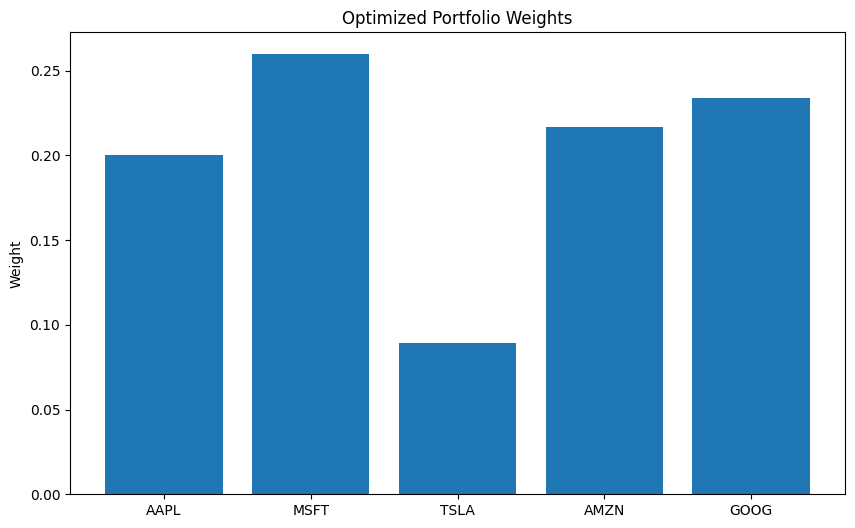

In [49]:
portfolio_solver = Portfolio_Solver(0.8, max_weight_threshold=0.3)
rsi_portfolio_weights = portfolio_solver.SolveSignalPortfolio(tickers, data, rsi_scores_array)
print("Final Portfolio Weights:", rsi_portfolio_weights)
portfolio_solver.ShowPortfolioWeights(tickers=tickers, portfolio_weights=rsi_portfolio_weights)

Total Portfolio Return: 147.66%
Annualized Portfolio Return: 147.66%


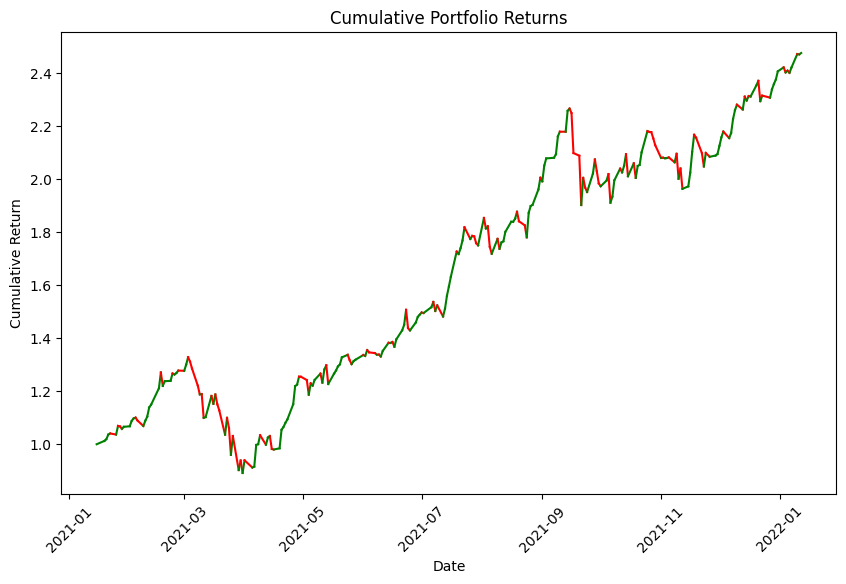

In [50]:
# Calculate portfolio returns and performance
cumulative_returns, total_return, annualized_return = portfolio_solver.CalculatePortfolioReturns(tickers, data, rsi_portfolio_weights)
# Show the portfolio performance plot
portfolio_solver.ShowPortfolioPerformance(cumulative_returns, data, start_date, end_date)

### MACD signal

In [51]:
# Calculate MACD for a specific date (e.g., '2021-01-15')
macd_signal = calculate_macd_signal(data, tickers, '2021-01-15')
macd_scores = [score[1] for score in macd_signal]
macd_scores_array = np.array(macd_scores)

     pcost       dcost       gap    pres   dres
 0: -5.1576e+00 -3.2420e+00  2e+01  5e+00  1e+00
 1: -9.9484e-01 -1.9725e+00  1e+00  9e-03  2e-03
 2: -1.0944e+00 -1.1813e+00  9e-02  7e-04  2e-04
 3: -1.1233e+00 -1.1306e+00  7e-03  2e-05  4e-06
 4: -1.1260e+00 -1.1268e+00  8e-04  6e-17  8e-17
 5: -1.1262e+00 -1.1262e+00  7e-05  2e-16  4e-17
 6: -1.1262e+00 -1.1262e+00  9e-07  2e-16  3e-16
Optimal solution found.
Optimized Portfolio Weights:
{'AAPL': np.float64(0.3348144344060194), 'MSFT': np.float64(0.6384780571753574), 'TSLA': np.float64(3.0398331043921347e-09), 'AMZN': np.float64(0.026707490081911443), 'GOOG': np.float64(1.5296878502408264e-08)}
Final Portfolio Weights: [3.34814434e-01 6.38478057e-01 3.03983310e-09 2.67074901e-02
 1.52968785e-08]


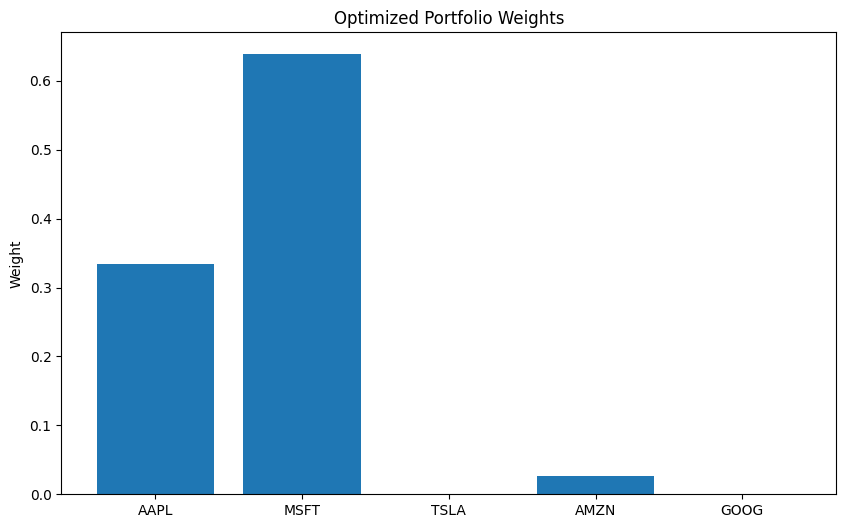

In [52]:
portfolio_solver = Portfolio_Solver(0.8, max_weight_threshold=0.3)
macd_portfolio_weights = portfolio_solver.SolveSignalPortfolio(tickers, data, macd_scores_array)
print("Final Portfolio Weights:", macd_portfolio_weights)
portfolio_solver.ShowPortfolioWeights(tickers=tickers, portfolio_weights=macd_portfolio_weights)

Total Portfolio Return: 76.57%
Annualized Portfolio Return: 76.57%


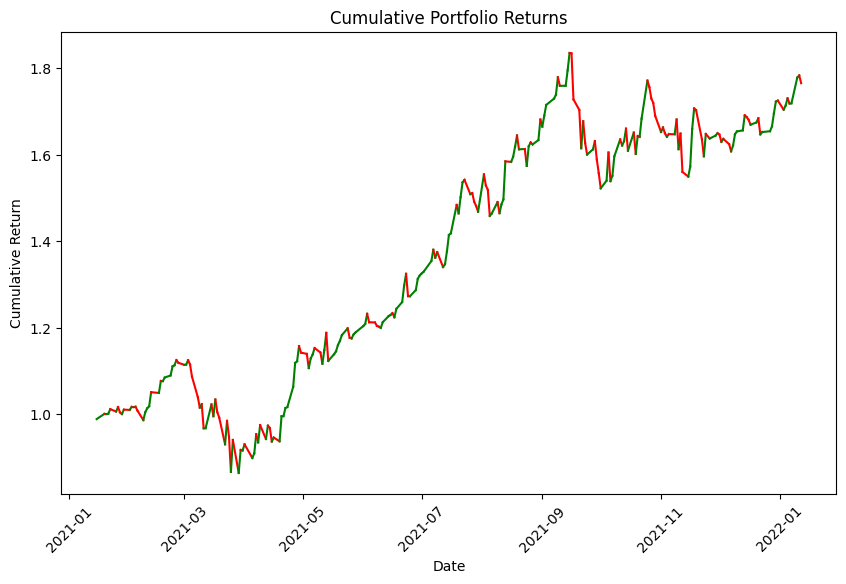

In [53]:
# Calculate portfolio returns and performance
cumulative_returns, total_return, annualized_return = portfolio_solver.CalculatePortfolioReturns(tickers, data, macd_portfolio_weights)
# Show the portfolio performance plot
portfolio_solver.ShowPortfolioPerformance(cumulative_returns, data, start_date, end_date)

### SMA signal

In [54]:
# Calculate SMA crossover signal for a specific date (e.g., '2021-01-15')
sma_signal = calculate_sma_signal(data, tickers, '2021-01-15')
sma_scores = [score[1] for score in sma_signal]
sma_scores_array = np.array(sma_scores)
print(sma_scores_array)

[19.99331339 13.46059525 81.52420954 11.69167049 11.39483007]


     pcost       dcost       gap    pres   dres
 0: -2.0345e-01 -1.3608e+00  1e+00  0e+00  3e+00
 1: -2.2219e-01 -3.2681e-01  1e-01  7e-17  3e-01
 2: -2.3998e-01 -2.5115e-01  1e-02  3e-16  5e-17
 3: -2.4069e-01 -2.4133e-01  6e-04  1e-16  8e-17
 4: -2.4070e-01 -2.4071e-01  8e-06  1e-16  3e-17
 5: -2.4070e-01 -2.4070e-01  8e-08  1e-16  7e-18
Optimal solution found.
Optimized Portfolio Weights:
{'AAPL': np.float64(0.131013770549819), 'MSFT': np.float64(0.07186850169197534), 'TSLA': np.float64(0.6880979748588887), 'AMZN': np.float64(0.055853547372232006), 'GOOG': np.float64(0.053166205527085036)}
Final Portfolio Weights: [0.13101377 0.0718685  0.68809797 0.05585355 0.05316621]


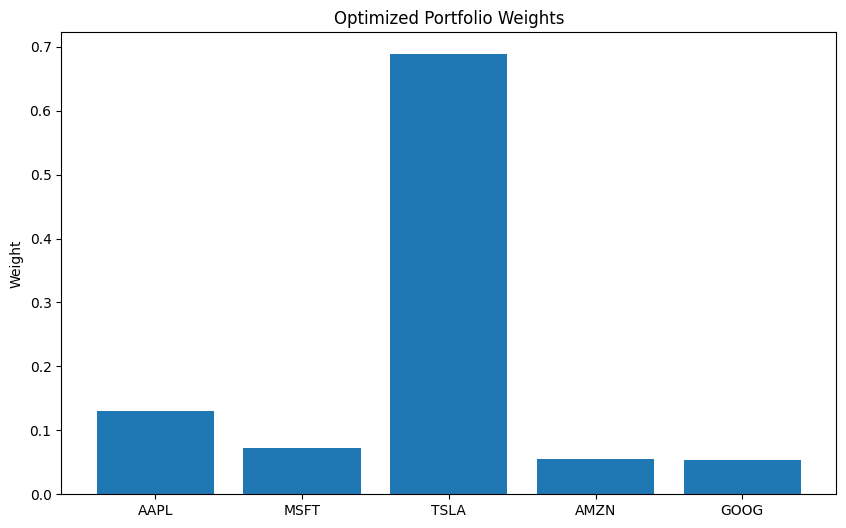

In [55]:
portfolio_solver = Portfolio_Solver(0.8, max_weight_threshold=0.3)
sma_portfolio_weights = portfolio_solver.SolveSignalPortfolio(tickers, data, sma_scores_array)
print("Final Portfolio Weights:", sma_portfolio_weights)
portfolio_solver.ShowPortfolioWeights(tickers=tickers, portfolio_weights=sma_portfolio_weights)

Total Portfolio Return: 54.65%
Annualized Portfolio Return: 54.65%


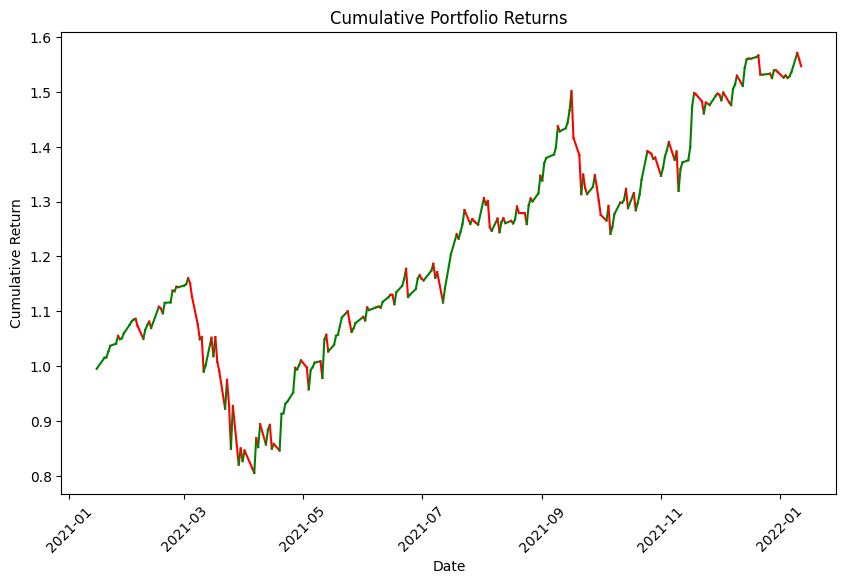

In [56]:
# Calculate portfolio returns and performance
cumulative_returns, total_return, annualized_return = portfolio_solver.CalculatePortfolioReturns(tickers, data, sma_portfolio_weights)
# Show the portfolio performance plot
portfolio_solver.ShowPortfolioPerformance(cumulative_returns, data, start_date, end_date)

rsi_signal_scores [48.0932841  42.67417018 66.28230185 42.67309414 46.45339573]
macd_signal_scores [-0.81744967 -0.98491459  1.88721933 -0.64751188 -0.12669522]
sma_signal_scores [19.99331339 13.46059525 81.52420954 11.69167049 11.39483007]
[ 67.26914782  55.14985083 149.69373072  53.71725276  57.72153058]
     pcost       dcost       gap    pres   dres
 0: -1.3988e-01 -1.2314e+00  1e+00  0e+00  3e+00
 1: -1.4431e-01 -2.1518e-01  7e-02  9e-17  2e-01
 2: -1.4874e-01 -1.5166e-01  3e-03  1e-16  4e-17
 3: -1.4876e-01 -1.4879e-01  3e-05  7e-17  3e-17
 4: -1.4876e-01 -1.4876e-01  3e-07  9e-17  1e-17
 5: -1.4876e-01 -1.4876e-01  3e-09  1e-16  3e-17
Optimal solution found.
Optimized Portfolio Weights:
{'AAPL': np.float64(0.16923113477158036), 'MSFT': np.float64(0.12973417482106578), 'TSLA': np.float64(0.4378540573922144), 'AMZN': np.float64(0.1250653184137642), 'GOOG': np.float64(0.13811531460137538)}


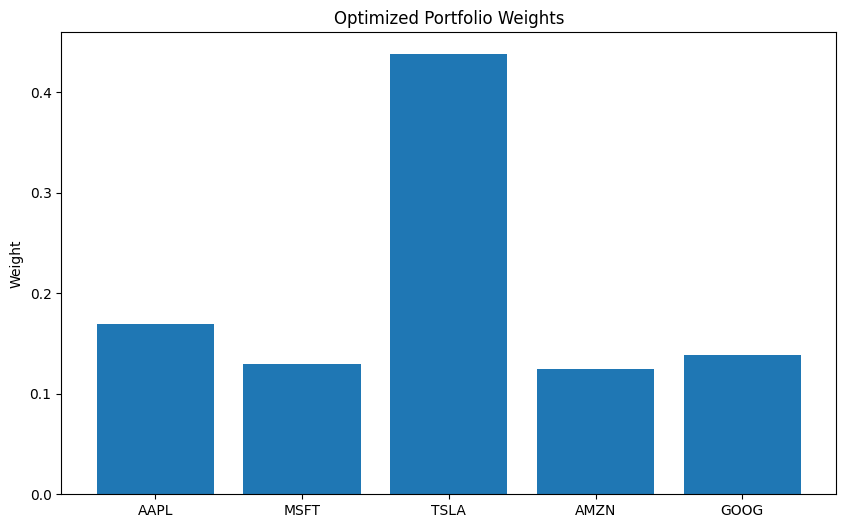

Total Portfolio Return: 92.24%
Annualized Portfolio Return: 92.24%


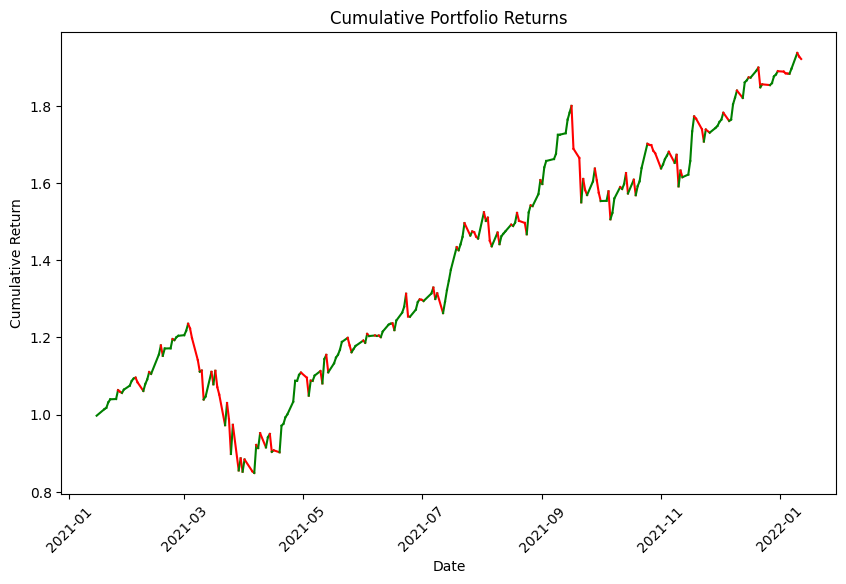

In [57]:
def combine_signals(signal_weights, signal_scores):
    rsi, macd, sma = signal_scores
    w_rsi, w_macd, w_sma = signal_weights
    new_rsi = rsi * w_rsi
    new_macd = macd * w_macd
    new_sma = sma * w_sma
    return new_rsi + new_macd + new_sma


trading_dates = ['2021-01-15']
# Example of Iterative Optimization
for date in trading_dates:
    # Step 1: Calculate the signals for this specific date
    rsi_signal_scores = calculate_rsi_signal(data, tickers, date, period=14)
    rsi_scores_array = np.array([score[1] for score in rsi_signal_scores])
    print("rsi_signal_scores", rsi_scores_array)

    macd_signal_scores = calculate_macd_signal(data, tickers, date)
    macd_scores_array = np.array([score[1] for score in macd_signal_scores])
    print("macd_signal_scores", macd_scores_array)

    sma_signal_scores = calculate_sma_signal(data, tickers, date)
    sma_scores_array = np.array([score[1] for score in sma_signal_scores])
    print("sma_signal_scores", sma_scores_array)


    # Step 2: Combine the signals into a single combined score
    signal_weights = [1,1,1]
    signal_scores = [rsi_scores_array, macd_scores_array, sma_scores_array]
    combined_scores = combine_signals(signal_weights, signal_scores)
    print(combined_scores)
    
    # Step 3: Optimize portfolio based on the combined signal scores
    portfolio_weights = portfolio_solver.SolveSignalPortfolio(tickers, data, combined_scores)
    portfolio_solver.ShowPortfolioWeights(tickers=tickers, portfolio_weights=portfolio_weights)
    
    # Step 4: Update the portfolio weights for this date
    cumulative_returns, total_return, annualized_return = portfolio_solver.CalculatePortfolioReturns(tickers, data, portfolio_weights)
    #cumulative_returns, total_return, annualized_return = portfolio_solver.CalculatePortfolioReturns(tickers, data, sma_portfolio_weights)
    # Optionally, store the results or plot the performance over time
    portfolio_solver.ShowPortfolioPerformance(cumulative_returns, data, start_date=date, end_date='2022-01-15')
    


In [ ]:
%pip install sklearn

In [61]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import talib as ta

In [75]:
class SignalWeightOptimizer:
    def __init__(self, tickers, data, signals, start_date='2020-01-01', end_date='2021-01-01', time_period=252):
        self.tickers = tickers
        self.data = data
        self.signals = signals
        self.start_date = start_date
        self.end_date = end_date
        self.time_period = time_period
        self.model = LinearRegression()
        self.scaler = StandardScaler()

    def calculate_signal_scores(self):
        """Calculate signal scores for the tickers."""
        rsi_scores = [self.calculate_rsi_signal(self.data, ticker) for ticker in self.tickers]
        macd_scores = [self.calculate_macd_signal(self.data, ticker) for ticker in self.tickers]
        sma_scores = [self.calculate_sma_signal(self.data, ticker) for ticker in self.tickers]

        return np.array(rsi_scores), np.array(macd_scores), np.array(sma_scores)
    
    def calculate_portfolio_return(self, weights, mean_returns, cov_matrix):
        """Calculate the portfolio return based on the given weights."""
        portfolio_return = np.dot(weights, mean_returns)
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        return portfolio_return  # Only consider return for training purposes
    
    def calculate_rsi_signal(self, data, ticker, period=14):
        """Calculate the RSI signal for a specific ticker."""
        close_prices = data['Close'][ticker]
        rsi = ta.RSI(close_prices, timeperiod=period)
        return rsi[-1]  # Return the last RSI value for the given date

    def calculate_macd_signal(self, data, ticker):
        """Calculate the MACD signal for a specific ticker."""
        close_prices = data['Close'][ticker]
        macd, macdsignal, _ = ta.MACD(close_prices, fastperiod=12, slowperiod=26, signalperiod=9)
        return macd[-1] - macdsignal[-1]  # MACD histogram value

    def calculate_sma_signal(self, data, ticker):
        """Calculate the SMA crossover signal for a specific ticker."""
        close_prices = data['Close'][ticker]
        sma_50 = ta.SMA(close_prices, timeperiod=50)
        sma_200 = ta.SMA(close_prices, timeperiod=200)
        return sma_50[-1] - sma_200[-1]  # Difference between short-term and long-term SMAs
    
    def train_model(self):
        # Get the signal scores 
        rsi_scores, macd_scores, sma_scores = self.calculate_signal_scores()

        # Prepare training data
        # Combine the signals into a feature matrix
        features = np.column_stack([rsi_scores, macd_scores, sma_scores])  

        # Fetch stock data for returns calculation
        returns = self.data['Close'].pct_change().dropna()
        mean_returns = returns.mean()
        cov_matrix = returns.cov()

        # Normalize features
        features = self.scaler.fit_transform(features)

        # Calculate portfolio returns (target)
        portfolio_returns = np.array([self.calculate_portfolio_return([1/len(self.tickers)] * len(self.tickers), mean_returns, cov_matrix) for _ in range(len(features))])

        # Train the model
        self.model.fit(features, portfolio_returns)
    
    def optimize_weights(self):
        # Once the model is trained, use it to predict the optimal weights for the signals
        weights = self.model.coef_  # The model coefficients correspond to the weights for each signal
        return weights

    def show_optimized_weights(self, tickers):
        weights = self.optimize_weights()
        weight_dict = {f"Signal {i+1}": weight for i, weight in enumerate(weights)}
        print(f"Optimized Weights: {weight_dict}")


In [73]:
import yfinance as yf
import pandas as pd
import numpy as np
from Utils.Solver import Portfolio_Solver  # Assuming this is your existing solver for portfolio optimization
from Utils.Signals import calculate_rsi_signal, calculate_macd_signal, calculate_sma_signal

# Step 1: Download historical stock data for the given tickers
tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOG']
data = yf.download(tickers, start='2020-01-01', end='2023-01-01')

# Step 2: Initialize the SignalWeightOptimizer
optimizer = SignalWeightOptimizer(
    tickers=tickers, 
    data=data, 
    signals=["RSI", "MACD", "SMA"], 
    start_date='2020-01-01', 
    end_date='2021-01-01', 
    time_period=252
)

# Step 3: Train the model to optimize the signal weights
optimizer.train_model()

# Step 4: Get the optimized signal weights
optimized_weights = optimizer.optimize_weights()


[*********************100%***********************]  5 of 5 completed


AttributeError: 'SignalWeightOptimizer' object has no attribute 'calculate_rsi_signal'